# 4.6 Mixture Models & Gaussian Process

## Objectives
* Definitions of Mixture Models and Gaussian Process
* Mixture models python examples
* Gaussian Process' python example
* Use of Gaussian process to model errors and process scientific data

# Mixture Models

* A common approach to model building is to combine or mix simpler models to obtain more complex ones. In statistics, these models are known as **Mixture models**.<br> 
* Mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. <br>
* Sometimes a process or phenomenon under study cannot be properly described using a single distribution like a Gaussian or a binomial, or any other pure distribution, but can be described as a mixture of such distributions. Models that assume the data comes from a mixture of distributions known as Mixture models. [1]  

Bayesian Gaussian Mixture model using plate notation<br>
![Image01](https://github.com/Health-Devices/Course-Uncertainty-Evaluation-in-Measurements-and-Machine-Learning/raw/d31e370d1410b8667fb33c98bf04c757ed406810/Course%20Material/4.6/mixturemodels.png)<br>
[copied from 1]

## Structure of a Mixture Model

### General Mixture Model

A typical finite-dimensional mixture model is a hierarchical model consisting of the following components:

1. N random variables that are observed, each distributed according to a mixture of **K** components, with the components belonging to the same parametric family of distributions but with different parameters. <br> 
2. N random latent variables specifying the identity of the mixture component of each observation, each distributed according to a K-dimensional categorical distribution.<br> 
3. A set of **K** mixture weights, which are probabilities that sum to 1.<br>
4. A set of **K** parameters, each specifying the parameter of the corresponding mixture component. If the mixture components are Gaussian distributions, there will be a mean and variance for each component. If the mixture components are categorical distributions there will be a vector of V probabilities summing to 1.  [1]

A parametric mixture model is described mathematically as follows: [1]<br>

$$K  = number \, of \, mixture\, components$$ <br>
$$N = number\,of\,observation$$ <br>
$${\theta}_{i=1...K} \quad = \, parameter\, of\, distribution\, of\, observation\, associated\, with\, component\, i$$ <br>
$${\Phi}_{i=1...K} \quad = \, mixture\, weight, \, i.e. \, prior\, probability\, of\, a\, particular\, component\, i$$ <br>
$${\Phi} \quad = \, K-dimensional\, vector\, composed \, of\, all\, the\, individual\, {\Phi}_{i=1...K}; \, must\, sum\, to\, 1$$ <br>
$$z_{i=1...N} \quad = \, component\, of\, observation\, i$$ <br>
$$x_{i=1...N} \quad = \, observation\, i$$ <br>


### Multi-variate Gaussian mixture model

A Bayesian Gaussian mixture model is extended to fit a vector of unknown parameters, or multivariate normal distributions. In a multivariate distribution (i.e. one modelling a vector with N random variables) one may model a vector of parameters using a Gaussian mixture model prior distribution on the vector of estimates given by,
$$ p(\theta) = \sum_{i=1}^{K}\Phi_i N(\mu_i, \sum_i ) $$

where the $i_{th}$ vector is characterized by normal distributions with weights $\Phi_i$, means $\mu_i$ and covariance matrices $\sum_i$. <br>
The multi-variate gaussian distribution is useful for patch wise shapes of images and clusters. [1]

### Parameter estimation and system identification

Parametric mixture models are used when the output i.e. distribution Y is known and can be sampled from X i.e. input values, but the values $a_i$ and $\theta_i$ are to evaluated. <br>
A variety of approaches for such problems are available, but the maximum likelihood methods such as expectation maximization(EM) or maximum a posteriori(MAP) are mainly used. [1]

### Expectation-Maximization (EM)

EM is the most widely used method to determine the parameters of a parametric mixture model distribution($a_i \, and \, \theta_i$). It is an iterative algorithm with two steps: 1)Expectation step and 2) Maximization step.   [1]

### Expectation Step
With initial guesses for the parameters of the mixture model, 'partial membership' of each data point in each constituent distribution is computed by calculating expectation values for the membership variables of each data point. [1]

### Maximization Step
With expectation values in hand for group membership, plug-iin estimates are recomputed for the distribution parameters. <br>
The mixing coefficients $a_i$ are the means of the values over the N data points. <br>
The component model parameters $\theta_i$ are calculated by expectation-maximization using data points $x_j$ that have been weighted using the values. <br>
With the new estimates being computed, the expectation step is repeated to recompute new values. The entire procedure is until the model parameters converge. [1]


## Gaussian Mixture Model:
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. [14] (The code is referenced from [7])

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### 1. Set up parameters

In [0]:
DIMENSIONS = 2
CLUSTERS = 10
DATA_POINTS = 10000

TRAINING_STEPS = 1000
TOLERANCE = 0

### 2. Build data generating function and plotting function

In [0]:
def generate_gmm_data(points, components, dimensions):
    """Generates synthetic data of a given size from a random GMM"""
    np.random.seed(10)

    c_means = np.random.normal(size=[components, dimensions]) * 10
    c_variances = np.abs(np.random.normal(size=[components, dimensions]))
    c_weights = np.abs(np.random.normal(size=[components]))
    c_weights /= np.sum(c_weights)

    result = np.zeros((points, dimensions), dtype=np.float32)

    for i in range(points):
        comp = np.random.choice(np.array(range(10)), p=c_weights)
        result[i] = np.random.multivariate_normal(
            c_means[comp], np.diag(c_variances[comp])
        )

    np.random.seed()

    return result, c_means, c_variances, c_weights

def plot_data(points, means):
    for cluster in range(CLUSTERS):
        plt.plot(points[:, 0], points[:, 1], ".", color='blue', zorder=0)
        plt.plot(means[cluster, 0], means[cluster, 1], ".", color="black", zorder=1)

    plt.show()

def plot_clustered_data(points, c_means, c_assignments):
    """Plots the cluster-colored data and the cluster means"""
    colors = cm.rainbow(np.linspace(0, 1, CLUSTERS))

    for cluster, color in zip(range(CLUSTERS), colors):
        c_points = points[c_assignments == cluster]
        plt.plot(c_points[:, 0], c_points[:, 1], ".", color=color, zorder=0)
        plt.plot(c_means[cluster, 0], c_means[cluster, 1], ".", color="black", zorder=1)

    plt.show()

### 3. Preparing Data

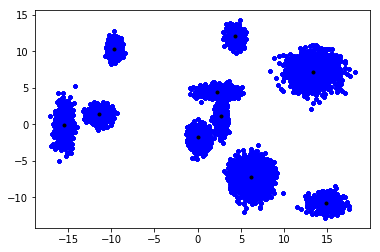

In [4]:
# generating DATA_POINTS points from a GMM with CLUSTERS components
data, true_means, true_variances, true_weights = generate_gmm_data(DATA_POINTS, CLUSTERS, DIMENSIONS)

# visualizing dataset
plot_data(data, true_means)

### 4. Building the computational graph

In [5]:
# model inputs: generated data points
input = tf.placeholder(tf.float32, [None, DIMENSIONS])

# trainable variables: clusters means
random_point_ids = tf.squeeze(tf.multinomial(tf.ones([1, tf.shape(input)[0]]), CLUSTERS))
means = tf.Variable(tf.gather(input, random_point_ids), dtype=tf.float32)

# E-step: recomputing cluster assignments according to the current means
inputs_ex, means_ex = tf.expand_dims(input, 0), tf.expand_dims(means, 1)
distances = tf.reduce_sum(tf.squared_difference(inputs_ex, means_ex), 2)
assignments = tf.argmin(distances, 0)

# M-step: relocating cluster means according to the computed assignments
sums = tf.unsorted_segment_sum(input, assignments, CLUSTERS)
counts = tf.reduce_sum(tf.one_hot(assignments, CLUSTERS), 0)
means_ = tf.divide(sums, tf.expand_dims(counts, 1))

# distortion measure: sum of squared distances 
# from each point to the closest cluster mean
distortion = tf.reduce_sum(tf.reduce_min(distances, 0))

# updating the means by new values
train_step = means.assign(means_)

W0805 00:03:31.446147 140657487599488 deprecation.py:323] From <ipython-input-5-589a2e603f43>:4: multinomial (from tensorflow.python.ops.random_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.random.categorical` instead.


### 5. Running the computational graph

0:	distortion 279267.28
1:	distortion 115495.66	re-assignments 535
2:	distortion 113300.78	re-assignments 594
3:	distortion 106469.66	re-assignments 428
4:	distortion 103539.92	re-assignments 304
5:	distortion 102992.20	re-assignments 430
6:	distortion 102056.59	re-assignments 501
7:	distortion 100830.68	re-assignments 389
8:	distortion 99981.49	re-assignments 293
9:	distortion 99676.41	re-assignments 173
10:	distortion 99590.03	re-assignments 107
11:	distortion 99570.54	re-assignments 63
12:	distortion 99563.09	re-assignments 42
13:	distortion 99559.91	re-assignments 31
14:	distortion 99555.82	re-assignments 43
15:	distortion 99551.01	re-assignments 36
16:	distortion 99549.36	re-assignments 32
17:	distortion 99547.52	re-assignments 31
18:	distortion 99544.93	re-assignments 41
19:	distortion 99541.86	re-assignments 39
20:	distortion 99539.36	re-assignments 36
21:	distortion 99537.41	re-assignments 34
22:	distortion 99535.56	re-assignments 32
23:	distortion 99534.09	re-assignments 31
24

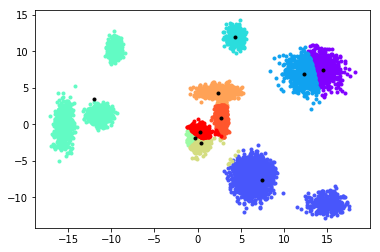

In [6]:
# RUNNING COMPUTATIONAL GRAPH

# creating session
sess = tf.InteractiveSession()

# initializing trainable variables
sess.run(tf.global_variables_initializer(), feed_dict={input: data})

previous_assignments = None

# training loop
for step in range(TRAINING_STEPS):
    # executing a training step and
    # fetching evaluation information
    distortion_measure, current_means, current_assignments, _ = sess.run(
        [distortion, means_, assignments, train_step],
        feed_dict={input: data}
    )

    if step > 0:
        # computing the number of re-assignments during the step
        re_assignments = (current_assignments != previous_assignments).sum()
        print("{0}:\tdistortion {1:.2f}\tre-assignments {2}".format(
            step, distortion_measure, re_assignments))

        # stopping if no re-assignments occurred
        if re_assignments <= TOLERANCE:
            break
    else:
        print("{0}:\tdistortion {1:.2f}".format(
            step, distortion_measure))

    previous_assignments = current_assignments

plot_clustered_data(data, current_means, current_assignments)

The uncertainty in the data points can be visualized by increasing the size of each point proportional to the certainty of its prediction. From the plot we can see that, the points on the boundary of clusters indicate the uncertainty of data points in the cluster.

### Mixture model example with data.npy
The code is copied from [6] with minor changes

In [7]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture

X = np.load('data.npy') #load data 
#print(X)
#fit GMM
gmm = GaussianMixture(n_components = 2, covariance_type = 'full', tol = 0.001)
gmm.fit(X)

#predict the values
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=None, cmap='viridis')
#plt.legend()
plt.show()

FileNotFoundError: ignored

In [0]:
#evaluate mean and covariance
print('The mean is:',gmm.means_)  
print('The covariance is:',gmm.covariances_)

The mean is: [[ 1.60629419  1.3470999 ]
 [ 3.0363831   3.09828041]]
The covariance is: [[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


In [0]:
probs = gmm.predict_proba(X)
print('The probability is:',probs[:5].round(2))

The probability is: [[ 0.01  0.99]
 [ 0.06  0.94]
 [ 0.    1.  ]
 [ 0.87  0.13]
 [ 0.    1.  ]]


Here a grid of all X and Y coordinates is created and GMM is evaluated. Then GMM can be plotted as contours over the original data.

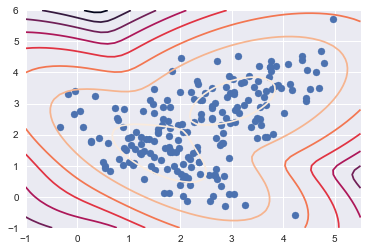

In [0]:
A, B = np.meshgrid(np.linspace(-1, 5.5), np.linspace(-1,6))
X_new = np.array([A.ravel(), B.ravel()]).T

C = gmm.score_samples(X_new)
C = C.reshape((50,50))

plt.contour(A, B, C)
plt.scatter(X[:, 0], X[:, 1])

plt.show()

Gaussian Mixture Models is a clustering technique that fits multivariate Gaussian distributions to the given data. [6]

## Gaussian Process (GP)

### Definition: 
For the function vector, $ f = (f(x_1),...f(x_n))$. 
If, for any choice of input points, $(x_1,...,x_n)$, the marginal distribution over f: <br> $$P(F) = \int_{f \not\in F} P(f) df $$ <br> is a multi-variate Gaussian then the distribution *P(f)* over the function *f* is said to be a **Gaussian Process**. [2]

A GP is parameterized with a mean function and a covariance function. <br>
A Gaussian Process Regression is an application of a multivariate Gaussian Distribution as a powerful predictive tool for data that is highly non-linear or not easily modeled using linear or multivariate regression. [14] <br>
GP's can be expressed entirely by:
1. vector of mean values defined by data at i/p variables $x_1,x_2,...,x_n$
2. covariance matrix across $(x_1,x_1), (x_2,x_2),...,(x_i,x_j)$ <br>

### Covariance functions
Gaussian processes can be completely defined by their second-order statistics. The covariance function completely defines the process behaviour when Gaussian function has mean = 0. <br>
Stationarity, Isotropy, Smoothness and Periodicity are the key aspects defined by covariance functions. <br>
**Stationarity** refers to the process's behaviour regarding the separation of any two points $x$ and $x'$. If the process is stationary,it depends on their separation, $x-x'$, while if non-stationary it depends on the actual position of the points $x$ and $x'$. <br>
If the process depends only on $|x-x'|$, the Euclidean distance between $x$ and $x'$, then the process is considered **Isotropic**. <br>
A process that is currently stationary and isotropic is considered to be **Homogeneous**. <br>
**Periodicity** refers to inducing periodic patterns within the behaviour of the process. [2]

### Gaussian process prediction or Kriging
For Kriging, it is assumed that for a Gaussian process $f$ observed at coordinates $x$, the vector of values $f(x)$ is just one sample from a multivariate Gaussian distribution of dimension equal to number of observed coordinates $|x|$. [2]

## Example: Exact GP Regression on Noisy Sinusoidal Data

Here we generate training data from a noisy sinusoid, then sample a bunch of curves from the posterior of the GP regression model. We use Adam to optimize the kernel hyperparameters (we minimize the negative log likelihood of the data under the prior). We plot the training curve, followed by the true function and the posterior samples.

The code is copied from [15 ] with minor changes

In [8]:
import numpy as np
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from tensorflow_probability import distributions as tfd
from tensorflow_probability import positive_semidefinite_kernels as tfk

%pylab inline
# Configure plot defaults
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = '#666666'
%config InlineBackend.figure_format = 'png'

Populating the interactive namespace from numpy and matplotlib


In [0]:
def reset_session():
  """Creates a new global, interactive session in Graph-mode."""
  global sess
  try:
    tf.reset_default_graph()
    sess.close()
  except:
    pass
  sess = tf.InteractiveSession()

reset_session()

In [0]:
def sinusoid(x):
  return np.sin(3 * np.pi * x[..., 0])

def generate_1d_data(num_training_points, observation_noise_variance):
  """Generate noisy sinusoidal observations at a random set of points.

  Returns:
     observation_index_points, observations
  """
  index_points_ = np.random.uniform(-1., 1., (num_training_points, 1))
  index_points_ = index_points_.astype(np.float64)
  # y = f(x) + noise
  observations_ = (sinusoid(index_points_) +
                   np.random.normal(loc=0,
                                    scale=np.sqrt(observation_noise_variance),
                                    size=(num_training_points)))
  return index_points_, observations_

In [0]:
# Generate training data with a known noise level (we'll later try to recover
# this value from the data).
NUM_TRAINING_POINTS = 100
observation_index_points_, observations_ = generate_1d_data(
    num_training_points=NUM_TRAINING_POINTS,
    observation_noise_variance=.1)

In [0]:
# Create the trainable model parameters, which we'll subsequently optimize.
# Note that we constrain them to be strictly positive.
amplitude = (np.finfo(np.float64).tiny +
             tf.nn.softplus(tf.Variable(initial_value=1.,
                                        name='amplitude',
                                        dtype=np.float64)))
length_scale = (np.finfo(np.float64).tiny +
                tf.nn.softplus(tf.Variable(initial_value=1.,
                                           name='length_scale',
                                           dtype=np.float64)))

observation_noise_variance = (
    np.finfo(np.float64).tiny +
    tf.nn.softplus(tf.Variable(initial_value=1e-6,
                               name='observation_noise_variance',
                               dtype=np.float64)))

In [0]:
# Create the covariance kernel, which will be shared between the prior (which we
# use for maximum likelihood training) and the posterior (which we use for
# posterior predictive sampling)
kernel = tfk.ExponentiatedQuadratic(amplitude, length_scale)

In [0]:
# Create the GP prior distribution, which we will use to train the model
# parameters.
gp = tfd.GaussianProcess(
    kernel=kernel,
    index_points=observation_index_points_,
    observation_noise_variance=observation_noise_variance)

# This lets us compute the log likelihood of the observed data. Then we can
# maximize this quantity to find optimal model parameters.
log_likelihood = gp.log_prob(observations_)

In [15]:
# Define the optimization ops for maximizing likelihood (minimizing neg
# log-likelihood!)
optimizer = tf.train.AdamOptimizer(learning_rate=.01)
train_op = optimizer.minimize(-log_likelihood)

W0805 00:04:24.837824 140657487599488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# Now we optimize the model parameters.
num_iters = 1000
# Store the likelihood values during training, so we can plot the progress
lls_ = np.zeros(num_iters, np.float64)
sess.run(tf.global_variables_initializer())
for i in range(num_iters):
  _, lls_[i] = sess.run([train_op, log_likelihood])

[amplitude_,
 length_scale_,
 observation_noise_variance_] = sess.run([
    amplitude,
    length_scale,
    observation_noise_variance])
print('Trained parameters:'.format(amplitude_))
print('amplitude: {}'.format(amplitude_))
print('length_scale: {}'.format(length_scale_))
print('observation_noise_variance: {}'.format(observation_noise_variance_))

Trained parameters:
amplitude: 0.8286547056334547
length_scale: 0.17309663986648044
observation_noise_variance: 0.12301189989139515


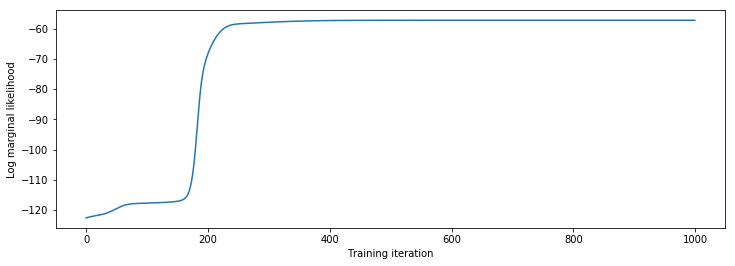

In [17]:
# Plot the loss evolution
plt.figure(figsize=(12, 4))
plt.plot(lls_)
plt.xlabel("Training iteration")
plt.ylabel("Log marginal likelihood")
plt.show()

In [0]:
# Having trained the model, we'd like to sample from the posterior conditioned
# on observations. We'd like the samples to be at points other than the training
# inputs.
predictive_index_points_ = np.linspace(-1.2, 1.2, 200, dtype=np.float64)
# Reshape to [200, 1] -- 1 is the dimensionality of the feature space.
predictive_index_points_ = predictive_index_points_[..., np.newaxis]

gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel,  # Reuse the same kernel instance, with the same params
    index_points=predictive_index_points_,
    observation_index_points=observation_index_points_,
    observations=observations_,
    observation_noise_variance=observation_noise_variance,
    predictive_noise_variance=0.)

# Create op to draw  50 independent samples, each of which is a *joint* draw
# from the posterior at the predictive_index_points_. Since we have 200 input
# locations as defined above, this posterior distribution over corresponding
# function values is a 200-dimensional multivariate Gaussian distribution!
num_samples = 50
samples = gprm.sample(num_samples)

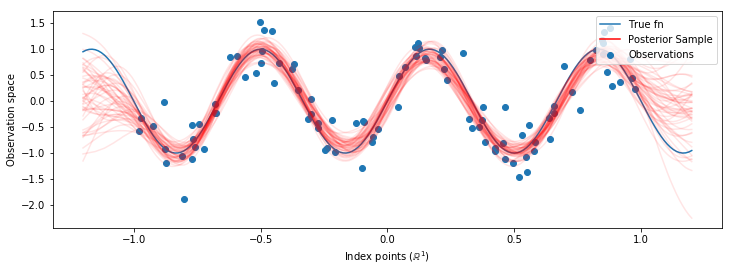

In [19]:
# Draw samples and visualize.
samples_ = sess.run(samples)

# Plot the true function, observations, and posterior samples.
plt.figure(figsize=(12, 4))
plt.plot(predictive_index_points_, sinusoid(predictive_index_points_),
         label='True fn')
plt.scatter(observation_index_points_[:, 0], observations_,
            label='Observations')
for i in range(num_samples):
  plt.plot(predictive_index_points_, samples_[i, :], c='r', alpha=.1,
           label='Posterior Sample' if i == 0 else None)
leg = plt.legend(loc='upper right')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlabel(r"Index points ($\mathbb{R}^1$)")
plt.ylabel("Observation space")
plt.show()

*Note: if you run the above code several times, sometimes it looks great and
other times it looks terrible! The maximum likelihood training of the parameters
is quite sensitive and sometimes converges to poor models. The best approach
is to use MCMC to marginalize the model hyperparameters.*

## Use of Gaussian Process to model errors and process scientific data

The method of Gaussian Process Regression(GPR) assumes that the data can be well modeled as a sample of a Gaussian Process.
We are given a set of inputs 'x' and its corresponding outputs 'y', called as training data. [9]<br>
Consider the following model of a sample Gaussian process, [9] $$ y(x) = \mu (x) + z(x) + z_0 $$ <br>
$$\mu (x) \rightarrow models\, unconditional\, expectation\, of\, process $$
$$z(x) \rightarrow Gaussian \, random\,field\,with\,zero\,mean\,and\,covariance $$
$$z_0 \rightarrow random \,variable\,called\,noise $$  

GPR models can predict the standard deviation of prediction and acts as a measure of uncertainty to the model's prediction. <br>
GPR can aslo perform the automatic tuning of adjustable parameters by maximum likelihood estmation(MLE). <br>
The hyperparameters $\theta,\, \sigma,\, \sigma_0,\, \mu \, and \, \mu_0 $ can help to evaluate the marginal likelihood of given data. <br>
The maximum likelihood predicts how likely the data is to occur given a particular model and serves as a rating of how well the model explains the data. [9]

### Applications:

###  $\rightarrow$ Design Optimization: [9]
The use of regression techniques to optimize designs has increased significantly. It combines the robustness of stochastic global search methods with the efficiency of traditional gradient based algorithms. <br>
The basic steps to build a model-based optimization algorithm are:
* Develop a local model for an unknown function; within the trust limits of the model
* Optimize the model
* Validate results and update the models based on required changes. Repeat until the model reaches its limits
 

###  $\rightarrow$ Measurement Error Estimation: [9]

Another application is to estimate measurement errors.<br>
It is done by fitting a parametric model to the measured data and the residual errors are used to build an estimate of the measurement error. <br>
In case of parametric approach, a systematic error is inroduced if the equation that describes the model us not specified correctly. In such a case, non-parametric data models can be used to estimate measurement errors. <br>
The maximum likelihood estimation of hyperparameters in GPR can estimate the measurement error by training the GPR model using data.

The output from an example using GPR method to process data from tunnel measurements of a rotor blade of a steam turbine is shown below.

![Image02](https://github.com/Health-Devices/Course-Uncertainty-Evaluation-in-Measurements-and-Machine-Learning/raw/d31e370d1410b8667fb33c98bf04c757ed406810/Course%20Material/4.6/fig1.png)

Above figure shows a gray-scale map of the prediction of a GPR model trained for experimental data. <br>
Darker areas correspond to a smaller entropy loss. [9]

### Gaussian process model with uncertain inputs:

Developing a model with uncertain or missing inputs is not an easy task. In statistics, the models dealing with uncertain inputs are called error-in-variables models. <br>
To demonstrate this using a Gaussian Process Prior model, the original model with inputs generated using Delta method is used. <br>
The covariances obtained from the data, estimates the randomness of input.  [10]

The following statistical model is assumed:
$$ t = f(x) + \in t $$ <br>
$$ x \rightarrow input, \, \in t \rightarrow additive\,gaussian\,white\,noise $$

In such a case of uncertain inputs, a new Gaussian process i.e. a generative model is developed using Delta method. <br>
On calculating the approximations using correlated and covariance funtions, the likelihood of data is obtained. <br>
The predictive distribution of a regular Gaussian Process model is a Gaussian with mean and variance. But the new model, leads to a predictive mean and variance which takes in accont the randomness of the training input.  [10]

#### The paper "Learning a Gaussian Process Model with Uncertain Inputs" gives a detailed mathematical explanation for the aforementioned process along with a couple of illustrative examples to verify the model.

## References
[1] https://en.wikipedia.org/wiki/Mixture_model <br>
[2] https://en.wikipedia.org/wiki/Gaussian_process <br>
[3] https://nbviewer.jupyter.org/gist/AustinRochford/96d7eb6256692b34661b0000e86ee4e0 <br>
[4] http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html <br>
[5] https://docs.pymc.io/notebooks/GP-slice-sampling.html#Gaussian-Process-Regression <br>
[6] https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/  <br>
[7] TensorFlow Example Models.[Online].Available: https://github.com/aakhundov/tf-example-models<br>
[8] https://stackoverflow.com/questions/41631161/understanding-gaussian-mixture-models <br>
[9] J. Hajek, Use of Gaussian Process Regression in Processing Scientific Data, 2008 <br>
[10] Agathe Girard, Raderick Murray-Smith; Learning a Gaussian Process Model with Uncertain Inputs. <br>
[11] Christopher K.I. Williams, Carl Edward Rasmussen; Gaussian Process Regression. <br>
[12] https://github.com/AM207/2017/blob/master/lectures/lecture25.md <br>
[13] https://towardsdatascience.com/a-visual-comparison-of-gaussian-process-regression-kernels-8d47f2c9f63c <br>
[14] https://www.techopedia.com/definition/30331/gaussian-mixture-model-gmm<br>
[15] Gaussian Process Regression in TensorFlow Probability.[Online].Available: https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Gaussian_Process_Regression_In_TFP.ipynb#scrollTo=56dF5DnkKx0a